# 1.) Import the data from CCLE into a new Google Colab file

In [75]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt

In [76]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [78]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/insurance.csv')


In [79]:
df.loc[df['sex'] == 'female','sex'] = 1.
df.loc[df['sex'] == 'male','sex'] = 0.

df['region1'] = df['region']
df['region2'] = df['region']
df['region3'] = df['region']

df.loc[df['region1'] == 'southwest','region1'] = 1
df.loc[df['region1'] == 'southeast','region1'] = 0
df.loc[df['region1'] == 'northwest','region1'] = 0
df.loc[df['region1'] == 'northeast','region1'] = 0

df.loc[df['region2'] == 'southwest','region2'] = 0
df.loc[df['region2'] == 'southeast','region2'] = 1
df.loc[df['region2'] == 'northwest','region2'] = 0
df.loc[df['region2'] == 'northeast','region2'] = 0

df.loc[df['region3'] == 'southwest','region3'] = 0
df.loc[df['region3'] == 'southeast','region3'] = 0
df.loc[df['region3'] == 'northwest','region3'] = 1
df.loc[df['region3'] == 'northeast','region3'] = 0


df.loc[df['smoker'] == 'yes','smoker'] = 1.
df.loc[df['smoker'] == 'no','smoker'] = 0.


In [80]:
df.head()


,age,sex,bmi,children,smoker,region,charges,region1,region2,region3
0,19,1.0,27.900,0,1.0,southwest,16884.92400,1,0,0
1,18,0.0,33.770,1,0.0,southeast,1725.55230,0,1,0
2,28,0.0,33.000,3,0.0,southeast,4449.46200,0,1,0
3,33,0.0,22.705,0,0.0,northwest,21984.47061,0,0,1
4,32,0.0,28.880,0,0.0,northwest,3866.85520,0,0,1


# 2.) Split the data into 80/20, in/out sample

In [66]:
import numpy as np

In [83]:
df_subset = df[['age','sex','bmi','children','smoker','region1','region2','region3']]
data = np.array(df_subset)
target = np.array(df.iloc[:,-4])

In [84]:
data

array([[19, 1.0, 27.9, ..., 1, 0, 0],
       [18, 0.0, 33.77, ..., 0, 1, 0],
       [28, 0.0, 33.0, ..., 0, 1, 0],
       ...,
       [18, 1.0, 36.85, ..., 0, 1, 0],
       [21, 1.0, 25.8, ..., 1, 0, 0],
       [61, 1.0, 29.07, ..., 0, 0, 1]], dtype=object)

In [85]:
target

array([16884.924 ,  1725.5523,  4449.462 , ...,  1629.8335,  2007.945 ,
       29141.3603])

In [86]:
cut = int((len(data)*.8)//1) #700

In [88]:
in_data = data [:cut]
out_data = data[cut:]
in_target = target[:cut]
out_target = target[cut:]

# 3.) Normalize the Data

In [89]:
from sklearn import preprocessing

In [90]:
scaler = preprocessing.StandardScaler().fit(in_data)

In [91]:
in_data_scale = scaler.transform(in_data)

out_data_scale = scaler.transform(out_data)

In [92]:
in_data

array([[19, 1.0, 27.9, ..., 1, 0, 0],
       [18, 0.0, 33.77, ..., 0, 1, 0],
       [28, 0.0, 33.0, ..., 0, 1, 0],
       ...,
       [39, 0.0, 42.655, ..., 0, 0, 0],
       [63, 0.0, 21.66, ..., 0, 0, 1],
       [54, 1.0, 31.9, ..., 0, 1, 0]], dtype=object)

In [93]:
in_data_scale

array([[-1.45390122,  1.02077653, -0.47403991, ...,  1.76504522,
        -0.6155209 , -0.55791981],
       [-1.52464584, -0.97964634,  0.4911621 , ..., -0.56655772,
         1.6246402 , -0.55791981],
       [-0.81719959, -0.97964634,  0.36455128, ..., -0.56655772,
         1.6246402 , -0.55791981],
       ...,
       [-0.03900872, -0.97964634,  1.95211949, ..., -0.56655772,
        -0.6155209 , -0.55791981],
       [ 1.65886228, -0.97964634, -1.50008089, ..., -0.56655772,
        -0.6155209 ,  1.79237229],
       [ 1.02216066,  1.02077653,  0.18367867, ..., -0.56655772,
         1.6246402 , -0.55791981]])

# 4.) Get lambda from Lasso cross validation

In [94]:
from sklearn.linear_model import LassoCV

In [95]:
modCV = LassoCV().fit(in_data_scale, in_target)

In [96]:
a = modCV.alpha_

In [97]:
a

115.9799859390741

# 5.) Run a lambda regression with that Lambda

In [99]:
from sklearn.linear_model import Lasso
mod1 = Lasso(alpha = a).fit(in_data_scale, in_target) 
mod1.predict(np.array(in_data_scale))
mod1.coef_

array([3580.35805206,    0.        , 1897.42890992,  415.06890389,
       9345.10115447, -238.7634887 , -158.68185954,   -0.        ])

# 6.) Visualize the coefficients 

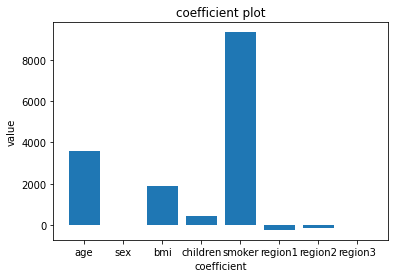

In [100]:
x_axis = (['age','sex','bmi','children', 'smoker','region1','region2','region3'])
y_axis = mod1.coef_
plt.bar(x_axis, y_axis)
plt.title('coefficient plot')
plt.xlabel('coefficient')
plt.ylabel('value')
plt.show()

# 7.) Interpret the coefficients

From the previous graphs，we can see that 
（age）：age have influence on the insurance, elderly people tende to spend more money on their insurance. 
（sex）：sex has nearly no influence on insurance spending.
（bmi）：bmi also have high influence, people have higher bmi index tend to buy higher insurance
（children）：people with children spend more on insurance.
（Smokers）：smokers are have the highest contribution to spend on health insurance.
（region）：people in the northeast  region (base group) are more likely to spend on health insurance.



# 8.) Compare in and out of sample MSE’s

In [101]:
from sklearn.metrics import mean_squared_error
in_y_pred = mod1.predict(np.array(in_data_scale))
out_y_pred = mod1.predict(np.array(out_data_scale))
out_sample_mse = mean_squared_error(out_y_pred,out_target)
in_sample_mse = mean_squared_error(in_y_pred,in_target)

In [102]:
out_sample_mse

37152269.57019608

In [104]:
in_sample_mse

36521811.462161295

In [105]:
in_y_pred = mod1.predict(np.array(in_data_scale))
out_y_pred = mod1.predict(np.array(out_data_scale))

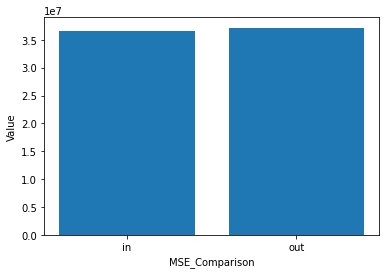

In [106]:
plt.bar(['in', 'out'], [in_sample_mse, out_sample_mse])
plt.xlabel('MSE_Comparison')
plt.ylabel('Value')
plt.show()